In [512]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040577.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5       6  \
0  1.073314  1.104594  1.140762  1.178886  1.217009  1.255132  1.2913   

          7         8         9  ...      4192      4193      4194      4195  \
0  1.325513  1.356794  1.385142  ...  1.293255  1.309873  1.324536  1.337243   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.347996  1.357771  1.366569  1.374389     110.39804      48.978981  

[1 rows x 4202 columns]
[110.39803983]  /  [48.978981]
          0         1         2         3         4         5       6  \
0  1.073314  1.104594  1.140762  1.178886  1.217009  1.255132  1.2913   

          7         8         9  ...      4190      4191      4192      4193  \
0  1.325513  1.356794  1.385142  ...  1.255132  1.274682  1.293255  1.309873   

       4194      4195      4196      4197      4198      4199  
0  1.324536  1.337243  1.347996  1.357771  1.366569  1.374389  

[1 rows x 4200 columns]


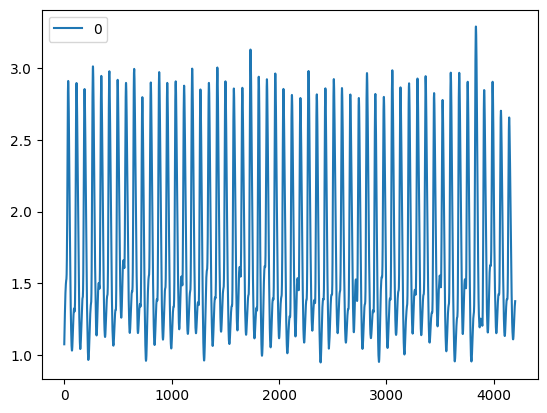

In [513]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [514]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

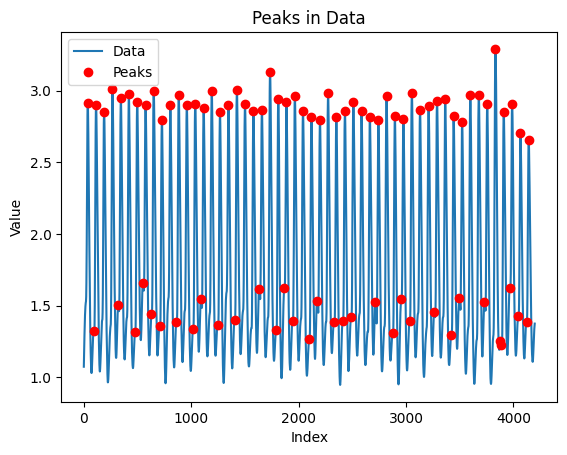

{'indices': array([  37,   92,  114,  189,  267,  321,  345,  420,  478,  497,  551,
        575,  630,  651,  705,  727,  806,  862,  884,  959, 1018, 1038,
       1090, 1116, 1191, 1246, 1268, 1347, 1404, 1426, 1501, 1579, 1633,
       1658, 1734, 1790, 1811, 1867, 1887, 1944, 1965, 2041, 2099, 2120,
       2172, 2199, 2275, 2329, 2352, 2411, 2432, 2490, 2510, 2586, 2663,
       2715, 2743, 2819, 2875, 2897, 2956, 2976, 3033, 3055, 3131, 3211,
       3265, 3289, 3365, 3423, 3444, 3497, 3523, 3599, 3678, 3731, 3757,
       3833, 3878, 3887, 3910, 3968, 3989, 4045, 4066, 4123, 4143]), 'values': array([2.91202346, 1.32355816, 2.8973607 , 2.85532747, 3.01368524,
       1.50146628, 2.94721408, 2.97947214, 1.31476051, 2.9198436 ,
       1.65982405, 2.89833822, 1.44183773, 2.99608993, 1.35483871,
       2.79863148, 2.90127077, 1.38807429, 2.97360704, 2.89833822,
       1.3372434 , 2.90909091, 1.54643206, 2.87878788, 2.99804497,
       1.36656891, 2.85239492, 2.89833822, 1.40078201, 3.005865

In [515]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [518]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.9120234604105573, None, 2.897360703812317, 2.855327468230694, 3.013685239491691, None, 2.9472140762463344, 2.979472140762464, None, 2.919843597262952, None, 2.898338220918866, None, 2.9960899315738025, None, 2.798631476050831, 2.9012707722385143, None, 2.973607038123167, 2.898338220918866, None, 2.909090909090909, None, 2.878787878787879, 2.9980449657869013, None, 2.852394916911046, 2.898338220918866, None, 3.005865102639296, 2.909090909090909, 2.859237536656892, None, 2.8641251221896384, 3.1309872922776147, None, 2.941348973607038, None, 2.9237536656891496, None, 2.963831867057673, 2.8563049853372435, None, 2.814271749755621, None, 2.792766373411535, 2.981427174975562, None, 2.8181818181818183, None, 2.860215053763441, None, 2.924731182795699, 2.86217008797654, 2.817204301075269, None, 2.792766373411535, 2.9667644183773216, None, 2.8211143695014664, None, 2.80058651026393, None, 2.986314760508309, 2.8670576735092865, 2.895405669599218, None, 2.9286412512218964, 2.945259042033236, N

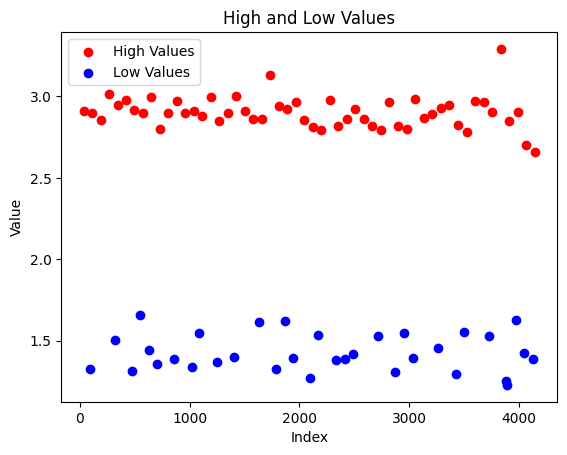

In [519]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [520]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.9021396763332246
Average Low Value: 1.4275304363280903


In [523]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=4, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [524]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.9021396763332246 : 0.7255349190833061
Scaled value of 1.4275304363280903 : 0.3568826090820226
